In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[*********************100%***********************]  1 of 1 completed


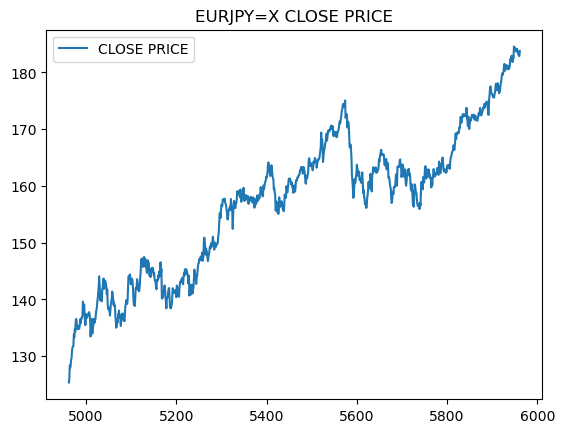

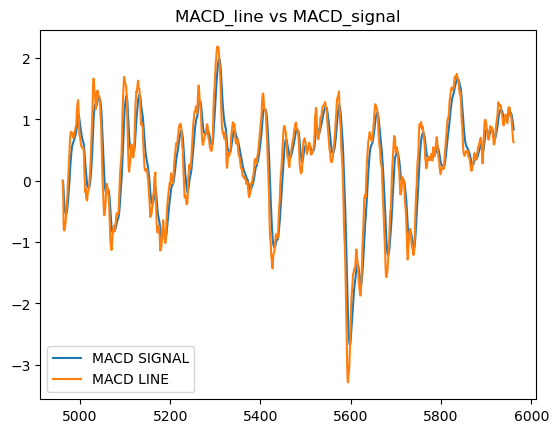

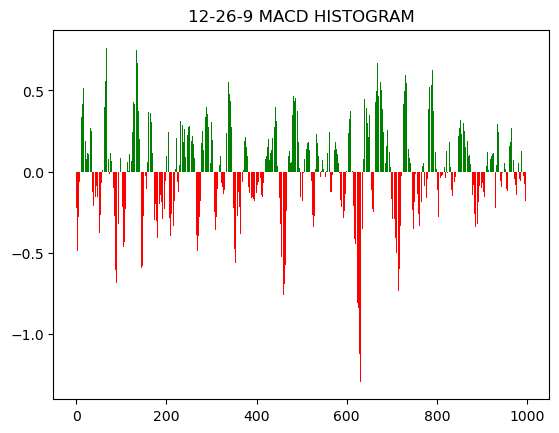

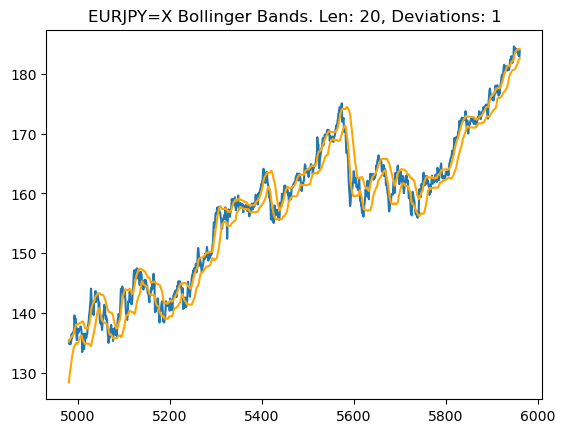

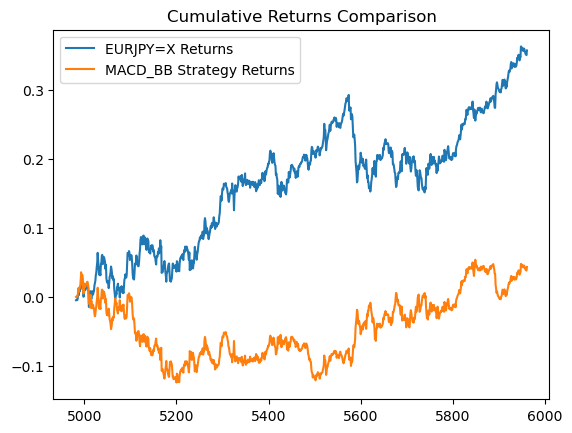

Price,Date,Close,High,Low,Open,Volume,12_ema,26_ema,MACD,MACD_signal,...,STD,Upper_Band,Lower_Band,BB_strategy,signal,MACD_strategy,full_strategy,strategy,Asset_returns,strategy_returns
4981,2022-04-04,135.404999,135.662003,134.763000,135.404999,0,133.953416,133.150932,0.802484,0.458747,...,3.437464,135.252415,128.377486,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4982,2022-04-05,134.770004,135.102005,134.289993,134.770004,0,134.079045,133.300594,0.778450,0.522688,...,3.137039,135.423089,129.149012,1.0,1.0,1.0,2.0,0.0,-0.004690,0.000000
4983,2022-04-06,134.856003,135.460999,134.757996,134.856003,0,134.198577,133.441779,0.756797,0.569510,...,2.824602,135.548053,129.898848,1.0,1.0,1.0,2.0,1.0,-0.004054,0.000638
4984,2022-04-07,134.828995,135.481995,134.460007,134.828995,0,134.295564,133.565630,0.729934,0.601595,...,2.663468,135.710919,130.383983,1.0,1.0,1.0,2.0,1.0,-0.004254,0.000438
4985,2022-04-08,134.817001,135.304001,134.360001,134.817001,0,134.375785,133.675678,0.700107,0.621297,...,2.401617,135.792368,130.989134,1.0,1.0,1.0,2.0,1.0,-0.004343,0.000349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5957,2026-01-06,183.479996,183.619995,183.000000,183.457993,0,183.531764,182.601677,0.930087,1.055470,...,1.085685,184.171284,181.999914,1.0,NaN,-1.0,0.0,1.0,0.355046,0.041652
5958,2026-01-07,183.126007,183.360992,182.710007,183.080994,0,183.469340,182.640516,0.828823,1.010141,...,0.945062,184.146261,182.256137,1.0,NaN,-1.0,0.0,1.0,0.352432,0.039642
5959,2026-01-08,183.026993,183.235992,182.720993,182.979996,0,183.401286,182.669144,0.732142,0.954541,...,0.845596,184.128645,182.437453,0.0,NaN,-1.0,-1.0,1.0,0.351700,0.039080
5960,2026-01-09,182.888000,183.944000,182.882996,182.910995,0,183.322319,182.685356,0.636964,0.891026,...,0.823630,184.132729,182.485469,0.0,NaN,-1.0,-1.0,1.0,0.350674,0.038291


In [8]:
ticker = "EURJPY=X"
interval = '1d'
period = 'max'

BB_LENGTH = 20 
devs= 1
LOOKBACK = -100
LOOKBACK = -1000

MACD_FAST = 12
MACD_SLOW = 26
MACD_SPAN = 9

def get_data(ticker, lookback=LOOKBACK, interval=interval, period=period):
    df = yf.download(ticker, period = period, auto_adjust=True, interval=interval)
    #reset index to get datetime as a column
    df = df.reset_index()

    df.sort_index(inplace=True)
    df.columns = df.columns.get_level_values(0)

    #only return data after lookback
    return df.iloc[lookback:,:]

def add_MACD(df, MACD_FAST, MACD_SLOW, MACD_SPAN):

    df[f'{MACD_FAST}_ema'] = df['Close'].ewm(span=MACD_FAST, adjust=False).mean()
    df[f'{MACD_SLOW}_ema'] = df['Close'].ewm(span=MACD_SLOW).mean()

    #macd line is the difference between the fast and slow ema
    df['MACD'] = df[f'{MACD_FAST}_ema'] - df[f'{MACD_SLOW}_ema']
    #macd signal is a 9-period moving average of the macd line
    df['MACD_signal'] = df['MACD'].ewm(span=MACD_SPAN, adjust=False).mean()
    #MACD histogram is the difference between the MACD line and the MACD signal line
    df['MACD_hist'] = df['MACD'] - df['MACD_signal']


    plt.plot(df['Close'], label='CLOSE PRICE')
    plt.title(f'{ticker} CLOSE PRICE')
    plt.legend()

    plt.figure()
    plt.plot(df['MACD_signal'], label='MACD SIGNAL')
    plt.plot(df['MACD'], label='MACD LINE')
    plt.legend()
    plt.title('MACD_line vs MACD_signal')

    plt.figure()
    plt.bar(range(len(df)), df['MACD_hist'], color=np.where(df['MACD_hist']<0, 'red', 'green'))
    plt.title(f'{MACD_FAST}-{MACD_SLOW}-{MACD_SPAN} MACD HISTOGRAM')

    return df

def MACD_strategy(df):
    df['MACD_strategy'] = 0
    df['MACD_strategy'] = np.where(df['MACD_hist'] > 0, 1, -1)
    df['MACD_strategy'] = df['MACD_strategy'].ffill()
    df['MACD_strategy'] = df['MACD_strategy'].fillna(0)
    df['MACD_strategy'] = df['MACD_strategy'].shift(1)  #shift by 1 to avoid lookahead bias
    return df

def add_bollinger_bands(df, BB_LENGTH, devs): 
    df['BB_SMA'] = df['Close'].rolling(window=BB_LENGTH).mean() 
    df['STD'] = df['Close'].rolling(window=BB_LENGTH).std()
    df['Upper_Band'] = df['BB_SMA'] + (df['STD'] * devs)
    df['Lower_Band'] = df['BB_SMA'] - (df['STD'] * devs)

    df = df.dropna()

    plt.figure()
    plt.plot(df['Close'])
    plt.plot(df['Upper_Band'], color='orange')
    plt.plot(df['Lower_Band'], color='orange')
    plt.title(f'{ticker} Bollinger Bands. Len: {BB_LENGTH}, Deviations: {devs}')

    return df

def BB_strategy(df):
    df['BB_strategy'] = 0

    conditions = [
        (df['Close'] > df["Upper_Band"]), # Condition 1: Short
        (df['Close'] < df["Lower_Band"]),
        (df['Close'] > df['BB_SMA']) & (df['Close'].shift(1) < df['BB_SMA']), 
        ((df['Close'] < df['BB_SMA']) & (df['Close'].shift(1) > df['BB_SMA']))   
    ]
    choices = [1, -1, 0, 0]
    df['signal'] = np.select(conditions, choices, default=np.nan)

    df['BB_strategy'] = df['signal'].ffill()
    df['BB_strategy'] = df['BB_strategy'].fillna(0)

    df['BB_strategy'] = df['BB_strategy'].shift(1)
    return df

def add_full_strategy(df):
    df['full_strategy'] = df['BB_strategy'] + df['MACD_strategy']

    conditions = [
        (df['full_strategy'] == 2), 
        (df['full_strategy'] == -2)   ]
    choices = [1, -1]
    
    df['signal'] = np.select(conditions, choices, default=np.nan)

    df['strategy'] = df['signal'].ffill()
    df['strategy'] = df['strategy'].fillna(0)
    df['strategy'] = df['strategy'].shift(1)

    return df

def test_strategy(df):
    df['Asset_returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['strategy_returns'] = (1 + df['Close'].pct_change() * df['strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df['Asset_returns'], label=f'{ticker} Returns')
    plt.plot(df['strategy_returns'], label='MACD_BB Strategy Returns')
    plt.legend()
    plt.title('Cumulative Returns Comparison')
    plt.show()

    return df

def main():
    df = get_data(ticker, LOOKBACK, interval, period)
    df = add_MACD(df, MACD_FAST, MACD_SLOW, MACD_SPAN)
    df = add_bollinger_bands(df, BB_LENGTH, devs)
    df = BB_strategy(df)
    df = MACD_strategy(df)
    df = add_full_strategy(df)
    df = test_strategy(df)
    plt.show()
    return df

df = main()
df